In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [4]:
DATA_PATH = "/content/drive/MyDrive/the_datas/data/"
DATA_PATH

'/content/drive/MyDrive/the_datas/data/'

- 시드값

In [5]:

SEED = 42

- 데이터 불러오기

In [6]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}train_tr_common_1.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}test_tr_common_1.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 12), (14940, 2), (441196, 12), (12225, 2))

- 공통 피처 파일 불러오기

In [7]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common_3_주석없음.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common_3_주석없음.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 932), (12225, 932))

# 결측치 처리

In [8]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

,0
일별구매횟수표준편차,664
3회이상count,4214
총_생식품_구매가격,9711
평균_생식품_구매가격,1574
구매금액표준편차,388
구매금액왜도,840
구매금액첨도,1265
월별_구매총액_변화_비율2_1,4251
월별_구매총액_변화_비율3_2,4209
월별_구매총액_변화_비율4_3,3622


In [9]:

mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

,0
일별구매횟수표준편차,443
3회이상count,3284
총_생식품_구매가격,7820
평균_생식품_구매가격,1257
구매금액표준편차,242
구매금액왜도,599
구매금액첨도,954
월별_구매총액_변화_비율2_1,3335
월별_구매총액_변화_비율3_2,3269
월별_구매총액_변화_비율4_3,2864


In [10]:
train_ft["구매금액표준편차"] = train_ft["구매금액표준편차"].fillna(0)
train_ft["구매금액왜도"] = train_ft["구매금액왜도"].fillna(0)
train_ft["구매금액첨도"] = train_ft["구매금액첨도"].fillna(0)

test_ft["구매금액표준편차"] = test_ft["구매금액표준편차"].fillna(0)
test_ft["구매금액왜도"] = test_ft["구매금액왜도"].fillna(0)
test_ft["구매금액첨도"] = test_ft["구매금액첨도"].fillna(0)

In [11]:
train_ft["총_생식품_구매가격"] = train_ft["총_생식품_구매가격"].fillna(0)
train_ft["평균_생식품_구매가격"] = train_ft["평균_생식품_구매가격"].fillna(0)
train_ft["3회이상count"] = train_ft["3회이상count"].fillna(0)


test_ft["총_생식품_구매가격"] = test_ft["총_생식품_구매가격"].fillna(0)
test_ft["평균_생식품_구매가격"] = test_ft["평균_생식품_구매가격"].fillna(0)
test_ft["3회이상count"] = test_ft["3회이상count"].fillna(0)


In [12]:
train_ft["일별구매횟수표준편차"] = train_ft["일별구매횟수표준편차"].fillna(0)
test_ft["일별구매횟수표준편차"] = test_ft["일별구매횟수표준편차"].fillna(0)

In [13]:
# train_ft["2004-05월_count_diff"] = train_ft["2004-05월_count_diff"].fillna(0)
# test_ft["2004-05월_count_diff"] = test_ft["2004-05월_count_diff"].fillna(0)

In [14]:
train_ft["월별_구매총액_변화비율_1_12"] = train_ft["월별_구매총액_변화비율_1_12"].fillna(0)
test_ft["월별_구매총액_변화비율_1_12"] = test_ft["월별_구매총액_변화비율_1_12"].fillna(0)
for i in range(1,12):
    train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)
    test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)

In [15]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [16]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 931), (12225, 931))

- 추가 피처 만들어 보기

In [17]:
cols = [ col for col in train_ft.columns if col.startswith("중_pivot_횟수비율_") ]

In [18]:
train_ft["중분류별_구매횟수비율_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수비율_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 934), (12225, 934))

## Feature Encoding

In [19]:
train_ft.shape, test_ft.shape

((14940, 934), (12225, 934))

In [20]:
cols = train_ft.select_dtypes("object").columns.tolist()
train_ft[cols].nunique()

,0
주구매지점,4
주구매_중분류,246
주구매_대분류,28
최대구매액_대분류,28
최소구매액_대분류,28


In [21]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [22]:
import category_encoders as ce

In [23]:
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
train_ft = pd.concat([train_ft,tmp],axis =1)

tmp = enc.transform(test_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
test_ft = pd.concat([test_ft,tmp],axis =1)

train_ft.shape, test_ft.shape

((14940, 1022), (12225, 1022))

In [24]:
enc = ce.count.CountEncoder()
train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

train_ft.shape, test_ft.shape

((14940, 1023), (12225, 1023))

- 문자열 피처 삭제

In [25]:
cols

['주구매지점', '주구매_중분류', '주구매_대분류', '최대구매액_대분류', '최소구매액_대분류']

In [26]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 1018), (12225, 1018))

In [27]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Inf 값 처리

In [28]:
mask = np.isinf(train_ft).sum() > 0
np.isinf(train_ft).sum()[mask]

,0
환불율,1
월별_구매총액_변화_비율2_1,2114
월별_구매총액_변화_비율3_2,2753
월별_구매총액_변화_비율4_3,2737
월별_구매총액_변화_비율5_4,2650
월별_구매총액_변화_비율6_5,2141
월별_구매총액_변화_비율7_6,2392
월별_구매총액_변화_비율8_7,1803
월별_구매총액_변화_비율9_8,2760
월별_구매총액_변화_비율10_9,2548


In [29]:
mask = np.isinf(test_ft).sum() > 0
np.isinf(test_ft).sum()[mask]

,0
환불율,1
월별_구매총액_변화_비율2_1,1811
월별_구매총액_변화_비율3_2,2226
월별_구매총액_변화_비율4_3,2230
월별_구매총액_변화_비율5_4,2116
월별_구매총액_변화_비율6_5,1805
월별_구매총액_변화_비율7_6,1903
월별_구매총액_변화_비율8_7,1388
월별_구매총액_변화_비율9_8,2200
월별_구매총액_변화_비율10_9,2125


In [30]:
cols = np.isinf(train_ft).sum()[mask].index
cols

Index(['환불율', '월별_구매총액_변화_비율2_1', '월별_구매총액_변화_비율3_2', '월별_구매총액_변화_비율4_3',
       '월별_구매총액_변화_비율5_4', '월별_구매총액_변화_비율6_5', '월별_구매총액_변화_비율7_6',
       '월별_구매총액_변화_비율8_7', '월별_구매총액_변화_비율9_8', '월별_구매총액_변화_비율10_9',
       '월별_구매총액_변화_비율11_10', '월별_구매총액_변화_비율12_11', '월별_구매총액_변화비율_1_12'],
      dtype='object')

In [31]:
train_inf = train_ft[cols].copy()
train_inf[np.isinf(train_inf)] = np.nan  # 무한대를 NaN으로 대체
train_inf = np.nan_to_num(train_inf, nan=np.nanmax(train_inf[~np.isinf(train_inf)]))
np.isinf(train_inf).sum().sum()

0

In [32]:
test_inf = test_ft[cols].copy()
test_inf[np.isinf(test_inf)] = np.nan  # 무한대를 NaN으로 대체
test_inf = np.nan_to_num(test_inf, nan=np.nanmax(test_inf[~np.isinf(test_inf)]))
np.isinf(test_inf).sum().sum()

0

In [33]:
train_ft[cols] = train_inf
test_ft[cols] = test_inf


In [34]:
np.isinf(train_ft).sum().sum(), np.isinf(test_ft).sum().sum()

(0, 0)

## Feature Scaling

# 정답 데이터

In [35]:
target = train_target["target"]
target

,target
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
14935,0.0
14936,0.0
14937,0.0
14938,1.0


# cv 점수 확인해보기

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

In [37]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


0.7156448990744215

In [38]:
# from xgboost import XGBClassifier

# model = XGBClassifier(random_state=SEED)
# scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
# np.mean(scores)

# XAI

In [39]:
pip install shap

# 모델 학습

In [40]:
# model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125445
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 981
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

In [41]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,075 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

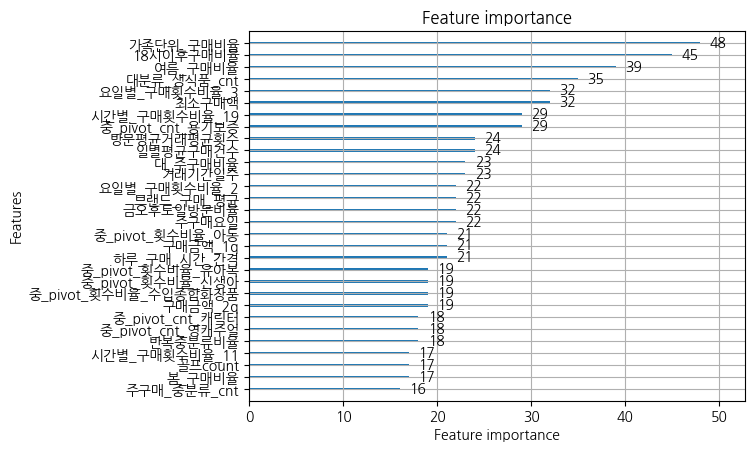

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
plot_importance(model, max_num_features=30)
plt.show()

In [42]:
import shap

In [43]:
explainer = shap.TreeExplainer(model)

In [44]:
shap_values = explainer.shap_values(test_ft)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


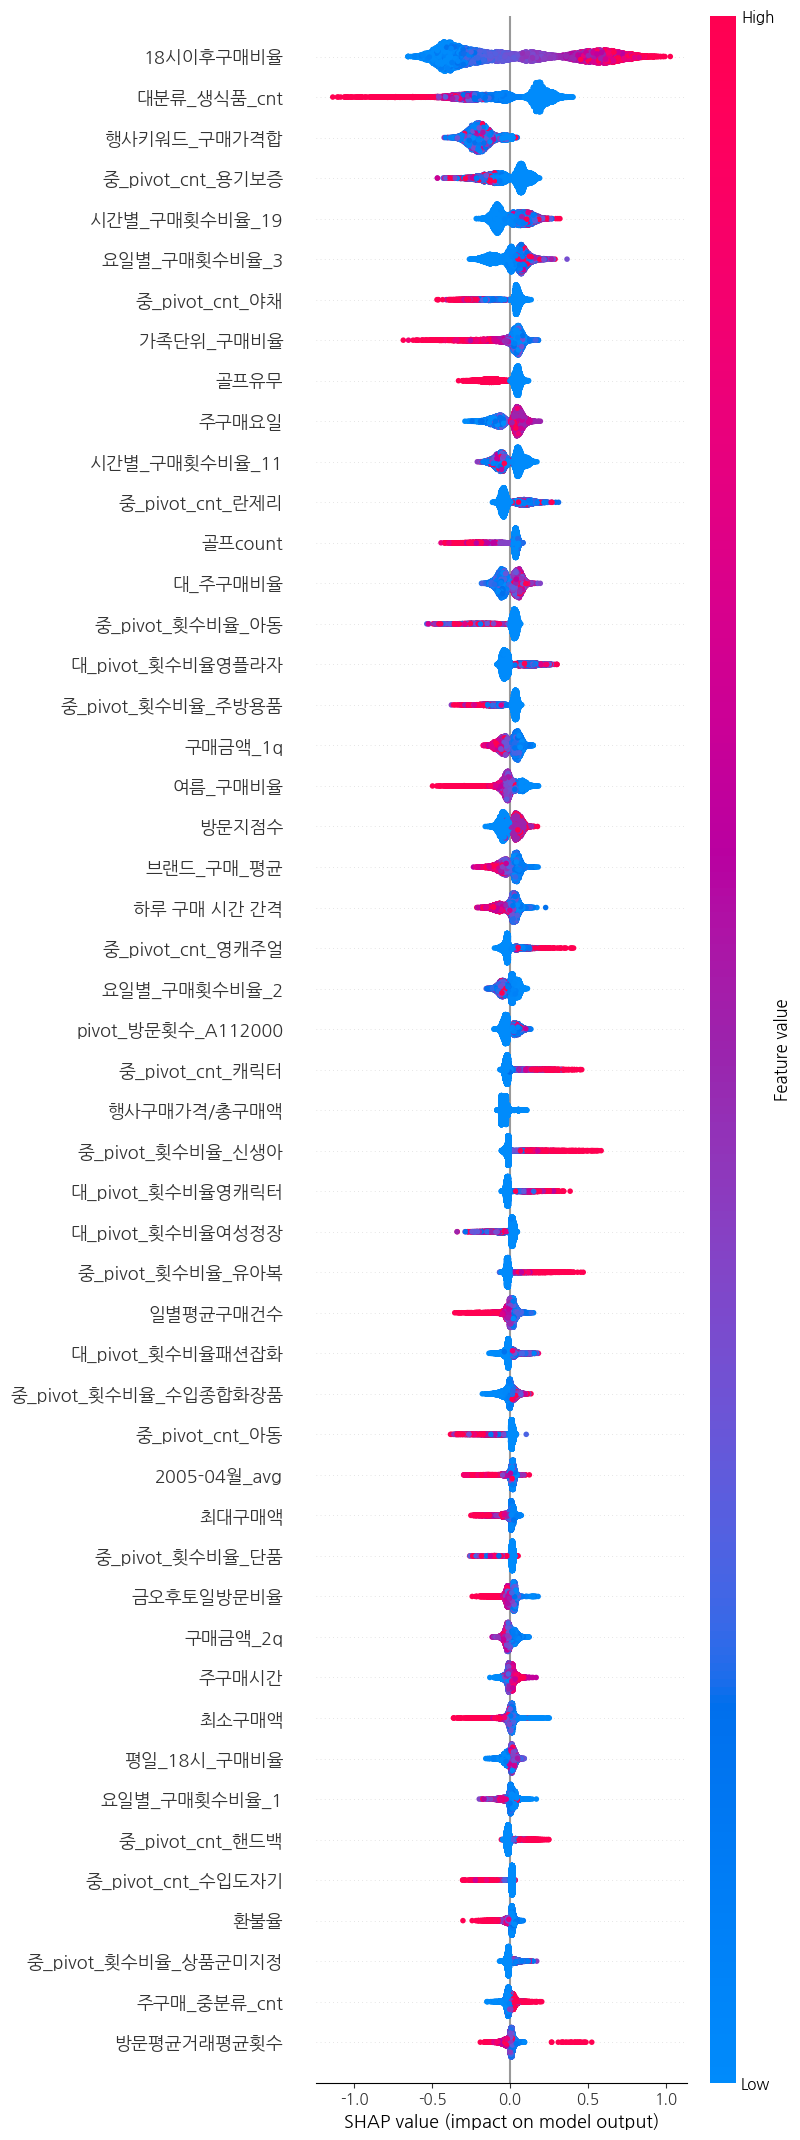

In [ ]:
shap.summary_plot(shap_values, test_ft, max_display= 50)

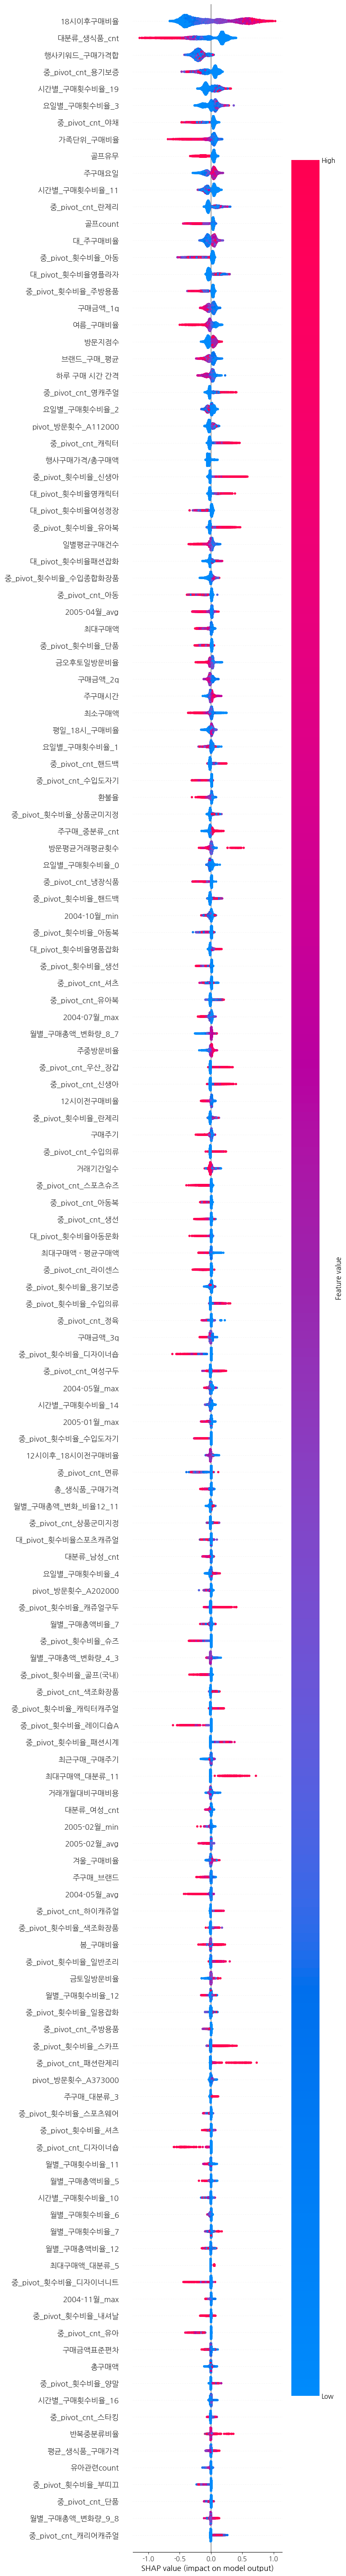

In [ ]:
shap.summary_plot(shap_values, test_ft, max_display= 150)

In [ ]:
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values, test_ft, interaction_index = "auto")
    print()

Output hidden; open in https://colab.research.google.com to view.

In [45]:
x = 0
for col in test_ft.columns:
    shap.dependence_plot(col, shap_values, test_ft, interaction_index = "auto")
    print(x+1)
    x = x + 1

Output hidden; open in https://colab.research.google.com to view.

In [1]:
len(test_ft.columns)

NameError: name 'test_ft' is not defined